In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [10]:
dataset = pd.read_csv(r"C:\Users\junai\OneDrive\Desktop\DB\50_Startups.csv")

In [11]:
len(dataset)

50

In [12]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [14]:
dataset.shape


(50, 5)

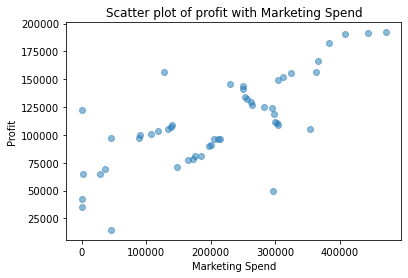

In [19]:
plt.scatter(dataset['Marketing Spend'], dataset ['Profit'], alpha = 0.5)
plt.title('Scatter plot of profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

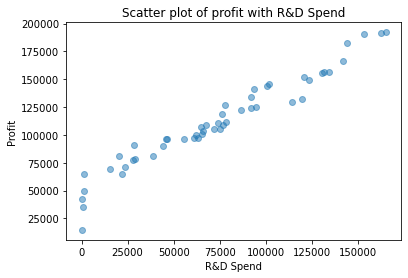

In [20]:
plt.scatter(dataset['R&D Spend'], dataset ['Profit'], alpha = 0.5)
plt.title('Scatter plot of profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

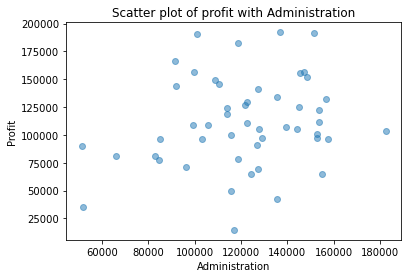

In [21]:
plt.scatter(dataset['Administration'], dataset ['Profit'], alpha = 0.5)
plt.title('Scatter plot of profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

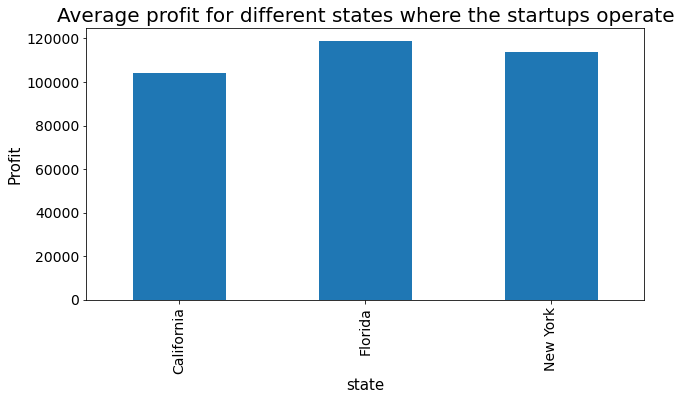

In [23]:
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
     figsize= (10,5),
     fontsize = 14
)

ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

ax.set_xlabel("state", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)


In [25]:
dataset.State.value_counts()


New York      17
California    17
Florida       16
Name: State, dtype: int64

In [27]:
dataset['NewYork_State'] =np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] =np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] =np.where(dataset['State']=='Florida', 1, 0)

dataset.drop(columns=['State'],axis=1,inplace=True)

In [28]:
dataset.head()


,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [29]:
dependent_variable = 'Profit'

In [32]:
independent_variables = dataset.columns.tolist()


In [33]:
independent_variables.remove(dependent_variable)


In [34]:
independent_variables

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'NewYork_State',
 'California_State',
 'Florida_State']

In [36]:
X = dataset[independent_variables].values

y = dataset[dependent_variable].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [39]:
X_train[0:10]

array([[0.33561668, 0.48655174, 0.45494286, 0.        , 0.        ,
        1.        ],
       [0.2782839 , 0.3173015 , 0.43561799, 1.        , 0.        ,
        0.        ],
       [0.45557444, 0.87258866, 0.28413435, 0.        , 0.        ,
        1.        ],
       [0.2807759 , 1.        , 0.44680961, 0.        , 1.        ,
        0.        ],
       [0.55488118, 0.59103645, 0.62511553, 0.        , 0.        ,
        1.        ],
       [0.7880179 , 0.88568959, 0.68649342, 0.        , 0.        ,
        1.        ],
       [0.72539353, 0.98922572, 0.54370828, 0.        , 0.        ,
        1.        ],
       [0.0060492 , 0.6847981 , 0.0040356 , 1.        , 0.        ,
        0.        ],
       [0.00327821, 0.00432296, 0.        , 1.        , 0.        ,
        0.        ],
       [0.39676926, 0.95618996, 0.22709197, 1.        , 0.        ,
        0.        ]])

In [40]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [41]:
y_pred = regressor.predict(X_test)

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

9702.583904853906

In [44]:
r2_score(y_test, y_pred)


0.9263892772884127

In [54]:
plt.scatter(X_train['Profit'], y_train, color='g') 
plt.plot(X_test['Profit'], y_pred, color='k') 

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

C:\Users\junai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


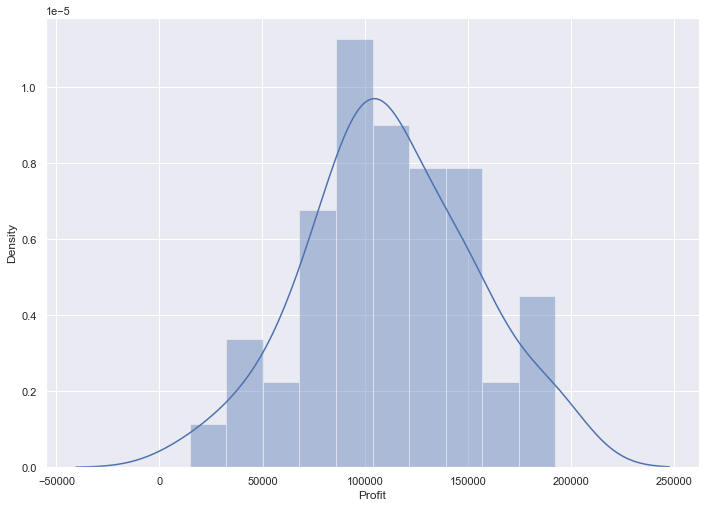

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['Profit'], bins=10)
plt.show()

<AxesSubplot:>

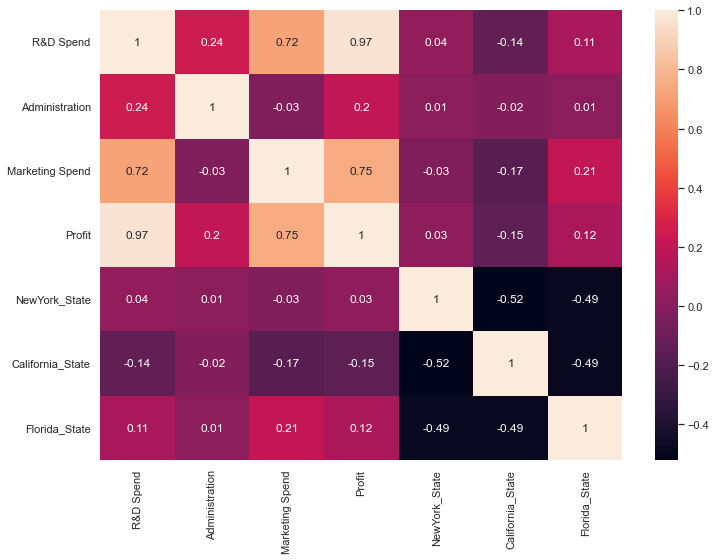

In [50]:
correlation_matrix = dataset.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)